In [849]:
import pandas as pd
import re
import numpy as np
import statistics as stat
import seaborn as sns

In [850]:
from scipy.stats.mstats import winsorize

In [851]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x > limit] 

In [852]:
def outlier(col):
    for i in cars.make_model.unique():
        for j in cars.Displacement.unique():
            for k in cars.hp.unique():
                    x = cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)]
                    cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)] = winsorize(x,(0.01,0.02))


In [853]:
cars = pd.read_csv("cleaned_cars.csv")

In [854]:
pd.set_option('display.max_rows', 999)

In [855]:
pd.set_option("display.max_columns",154)

In [856]:
cars.drop("Unnamed: 0",inplace=True,axis=1)

In [857]:
cars.drop(["Body Color Original","Emission Label"],inplace=True,axis=1)

In [858]:
cars

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Gears,Age,Types,age_as_month,Comb,City,Country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000000,2016-01-01,66.0,2,0,2016,Black,Metallic,"Cloth, Black",Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,4,Used,47,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.000000,2017-03-01,141.0,1,3,2017,Red,Metallic,"Cloth, Grey",Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",['\n7\n'],3,Used,33,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.000000,2016-02-01,85.0,1,0,2016,Black,Metallic,"Cloth, Black",Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,4,Used,46,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.000000,2016-08-01,66.0,1,0,2016,Brown,Metallic,"Cloth, Black",Sedans,3.0,4.0,Automatic,1422.0,3.0,1195.000000,diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",['\n6\n'],4,Used,40,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200.000000,2016-05-01,66.0,1,0,2016,Black,Metallic,"Cloth, Black",Sedans,5.0,5.0,Automatic,1422.0,3.0,1227.309322,diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,4,Used,43,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,0.000000,2019-01-01,147.0,0,24,2019,Grey,Metallic,"Full leather, Brown",Van,5.0,5.0,Automatic,1997.0,4.0,1758.000000,diesel,139,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",['\n6\n'],1,New,11,5.3,6.2,4.7
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,9900.000000,2019-01-01,165.0,1,25,2019,Grey,Metallic,Cloth,Van,5.0,5.0,Automatic,1798.0,4.0,1708.000000,benzin,168,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",['\n7\n'],1,Used,11,7.4,9.2,6.3
15916,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15.000000,2019-03-01,146.0,1,27,2019,White,Metallic,"Full leather, Black",Van,5.0,7.0,Automatic,1997.0,4.0,1773.400000,diesel,139,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",['\n6\n'],1,Pre-registered,9,5.3,6.2,4.7
15917,Renault Espace,"Blue dCi 200CV EDC

# NR OF DOORS

In [859]:
cars["Nr. of Doors"].value_counts()

5.0    11575
4.0     3079
3.0      832
2.0      219
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [860]:
cars.groupby(["make_model","body_type"])["Nr. of Doors"].value_counts(dropna = False)

make_model      body_type      Nr. of Doors
Audi A1         Compact        5.0              666
                               4.0              207
                               3.0               80
                               2.0               69
                               NaN               17
                Coupe          2.0                1
                               5.0                1
                Other          5.0                8
                               4.0                5
                Sedans         5.0             1048
                               4.0              321
                               3.0              130
                               2.0               29
                               NaN               10
                Station wagon  5.0               17
                               4.0                3
                               3.0                1
                Van            5.0                1
Audi A2         Off-

In [861]:
cars["Nr. of Doors"] = cars.groupby(["make_model","body_type"])["Nr. of Doors"].ffill()

In [862]:
cars["Nr. of Doors"].fillna(method="ffill",inplace=True)

In [863]:
cars.groupby(["make_model","body_type"])["Nr. of Doors"].value_counts(dropna = False)

make_model      body_type      Nr. of Doors
Audi A1         Compact        5.0              679
                               4.0              211
                               3.0               80
                               2.0               69
                Coupe          2.0                1
                               5.0                1
                Other          5.0                8
                               4.0                5
                Sedans         5.0             1053
                               4.0              323
                               3.0              132
                               2.0               30
                Station wagon  5.0               17
                               4.0                3
                               3.0                1
                Van            5.0                1
Audi A2         Off-Road       5.0                1
Audi A3         Compact        5.0              165
                    

In [864]:
cars["Nr. of Doors"] = cars["Nr. of Doors"].apply(lambda x: 3.0 if x == 2.0 else x)

In [865]:
cars["Nr. of Doors"] = cars["Nr. of Doors"].apply(lambda x: 5.0 if x == 1.0 or x== 7.0  else x)

In [866]:
cars.groupby(["make_model","body_type"])["Nr. of Doors"].ffill()

0        5.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: Nr. of Doors, Length: 15919, dtype: float64

# gears

In [867]:
cars["Gears"].isnull().sum()

4712

In [868]:
cars["Gears"].unique()

array([nan, "['\\n7\\n']", "['\\n6\\n']", "['\\n5\\n']", "['\\n8\\n']",
       "['\\n1\\n']", "['\\n2\\n']", "['\\n50\\n']", "['\\n9\\n']",
       "['\\n3\\n']", "['\\n4\\n']"], dtype=object)

In [869]:
cars["Gear"]=cars["Gears"].apply(lambda x : "".join([i for i in x if i.isnumeric()]) if x is not np.nan else x)

In [870]:
cars["Gear"] = cars["Gear"].astype(float)

In [871]:
cars["Gear"].value_counts(dropna=False) 

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
4.0        2
3.0        2
1.0        2
50.0       1
2.0        1
Name: Gear, dtype: int64

In [872]:
cars["Gear"] = cars["Gear"].apply(lambda x: 5.0 if x==9.0 or x==4.0 or x==1.0 or x==3.0 or x== 50.0 or x== 2.0 else x)

In [873]:
cars["Gear"].value_counts(dropna=False) 

6.0    5822
NaN    4712
5.0    3253
7.0    1908
8.0     224
Name: Gear, dtype: int64

In [874]:
cars.groupby(["make_model","Gearing Type"])["Gear"].ffill().value_counts(dropna=False) 

6.0    8377
5.0    4404
7.0    2835
8.0     286
NaN      17
Name: Gear, dtype: int64

In [875]:
cars["Gear"].fillna(method="ffill",inplace=True)

In [876]:
cars["Gear"].fillna(method="bfill",inplace=True)

In [877]:
cars["Gear"].isnull().sum()

0

In [878]:
cars.drop("Gears",axis=1,inplace=True)

# body type

In [879]:
cars["body_type"].isnull().sum()

60

In [880]:
cars["body_type"]=cars.groupby("make_model")["body_type"].ffill()

In [881]:
cars["body_type"].fillna(method="ffill",inplace=True)

# emission class

In [882]:
cars["Emission Class"]

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: Emission Class, Length: 15919, dtype: object

In [883]:
show_nans(cars,10)

vat               28.349771
Emission Class    22.790376
Comb              16.050003
City              16.050003
Country           16.050003
dtype: float64

# Comb

In [884]:
cars["Comb"] = cars.groupby(["Fuel","Weight","hp","Displacement"])["Comb"].ffill()

In [885]:
cars["Comb"] = cars.groupby(["Fuel","hp","Displacement"])["Comb"].ffill()

In [886]:
cars["Comb"] = cars.groupby(["Fuel","Displacement"])["Comb"].ffill()

In [887]:
cars["Comb"] = cars.groupby("Fuel",)["Comb"].ffill()

In [888]:
cars["Comb"].isnull().sum()

0

# City

In [889]:
cars["City"] = cars.groupby(["Fuel","Weight","hp","Displacement"])["City"].ffill()

cars["City"] = cars.groupby(["Fuel","hp","Displacement"])["City"].ffill()

cars["City"] = cars.groupby(["Fuel","Displacement"])["City"].ffill()

cars["City"] = cars.groupby("Fuel",)["City"].ffill()

cars["City"].isnull().sum()

0

# Country

In [890]:
cars["Country"] = cars.groupby(["Fuel","Weight","hp","Displacement"])["Country"].ffill()

cars["Country"] = cars.groupby(["Fuel","hp","Displacement"])["Country"].ffill()

cars["Country"] = cars.groupby(["Fuel","Displacement"])["Country"].ffill()

cars["Country"] = cars.groupby("Fuel",)["Country"].ffill()

cars["Country"].isnull().sum()

0

# VAT

In [891]:
cars["vat"] =cars.groupby("make_model")["vat"].ffill()

In [892]:
cars["vat"].isnull().sum()

4

In [893]:
cars["vat"].fillna(method="ffill",inplace=True)

# concatnate categorical columns

# extra

In [894]:
extra = cars["Extra"].str.get_dummies(",")
extra

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [895]:
safety = cars["Safety & Security"].str.get_dummies(",")
safety

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [896]:
media= cars["Entertainment & Media"].str.get_dummies(",")

In [897]:
comfort = cars["Comfort & Convenience"].str.get_dummies(",")
comfort

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [898]:
body_type =cars["body_type"].str.get_dummies()
body_type

,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,0,1
15915,0,0,0,0,0,0,0,0,1
15916,0,0,0,0,0,0,0,0,1
15917,0,0,0,0,0,0,0,0,1


In [899]:
cars["body_type"].value_counts(dropna=False)

Sedans           7922
Station wagon    3563
Compact          3161
Van               800
Other             292
Transporter        91
Off-Road           57
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [900]:
vat = cars["vat"].str.get_dummies()
vat

,Price negotiable,VAT deductible
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
15914,0,1
15915,0,1
15916,0,1
15917,0,1


In [901]:
body_color = cars["Body Color"].str.get_dummies()
body_color

,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15915,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15916,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15917,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [902]:
paint = cars["Paint Type"].str.get_dummies()
paint

,Metallic,Perl effect,Uni/basic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
15914,1,0,0
15915,1,0,0
15916,1,0,0
15917,1,0,0


In [903]:
def uphols(x):
    if "Cloth" in x:
        return "Cloth"
    elif "Part leather" in x:
        return "Part leather"
    elif "Full leather" in x:
        return "Full leather"
    elif "Velour" in x:
        return "Velour"
    elif "alcantara" in x:
        return "alcantara"

In [904]:
cars["Upholstery"] = cars["Upholstery"].apply(uphols)

In [905]:
uphols = cars["Upholstery"].str.get_dummies()
uphols

,Cloth,Full leather,Part leather,Velour,alcantara
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
15914,0,1,0,0,0
15915,1,0,0,0,0
15916,0,1,0,0,0
15917,0,0,1,0,0


In [906]:
gear_type = cars["Gearing Type"].str.get_dummies()
gear_type

,Automatic,Manual,Semi-automatic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
15914,1,0,0
15915,1,0,0
15916,1,0,0
15917,1,0,0


In [907]:
Fuel = cars["Fuel"].str.get_dummies()


In [908]:
types = cars["Types"].str.get_dummies()

In [909]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,VAT deductible,73000.0,2016-08-01,66.0,1,0,2016,Brown,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1422.0,3.0,1195.000000,diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",4,Used,40,3.8,4.3,3.5,6.0
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,VAT deductible,16200.0,2016-05-01,66.0,1,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1227.309322,diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",4,Used,43,4.1,4.6,3.8,6.0


In [910]:
cars_new = pd.concat([cars,extra,safety,media,comfort,body_type,vat,body_color,uphols,gear_type,Fuel,types],axis=1 )

In [911]:
cars_new.head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,...,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,...,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,

# handle with outliers

# Weight

In [912]:
cars.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [913]:

def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k),col]
            if len(x) == 0:
                pass
            else:    
                y = pd.Series(winsorize(x,(0.11,0.12)))
                y.index = x.index
            
                cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k),col] = y

In [914]:
cars_new.loc[(cars_new.make_model == "Audi A1")&(cars_new.hp == 110.0),"Weight"]

184     1221.666667
200     1221.666667
249     1230.000000
408     1205.000000
912     1221.666667
942     1221.666667
946     1180.000000
960     1240.000000
1006    1230.000000
1029    1215.000000
1038    1180.000000
1565    1230.000000
1585    1221.666667
1612    1220.000000
1620    1240.000000
1635    1240.000000
1641    1180.000000
1656    1221.666667
1692    1221.666667
1693    1221.666667
1890    1180.000000
1959    1240.000000
2000    1248.846154
2015    1248.846154
2063    1240.000000
2138    1180.000000
2175    1240.000000
2353    1240.000000
2360    1655.000000
2383    1248.846154
Name: Weight, dtype: float64

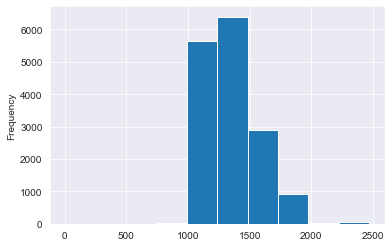

In [915]:
cars["Weight"].plot.hist()

In [916]:
cars_new["Weight"].describe()

count    15919.000000
mean      1353.297803
std        206.527864
min          1.000000
25%       1184.000000
50%       1315.686869
75%       1470.215909
max       2471.000000
Name: Weight, dtype: float64

In [917]:
outlier("Weight")

In [918]:
cars_new["Weight"].tail()

15914    1758.0
15915    1708.0
15916    1773.4
15917    1758.0
15918    1685.0
Name: Weight, dtype: float64

In [919]:
cars["Weight"].tail()

15914    1758.0
15915    1708.0
15916    1773.4
15917    1758.0
15918    1685.0
Name: Weight, dtype: float64

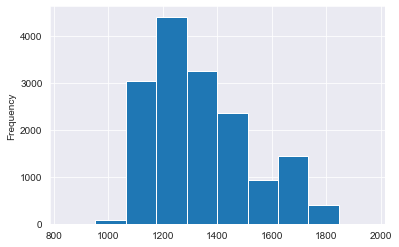

In [920]:
cars_new["Weight"].plot.hist()

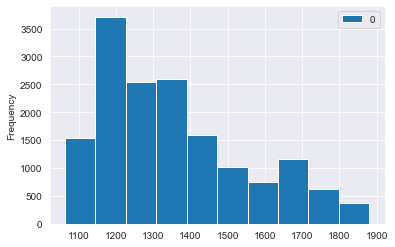

In [921]:
pd.DataFrame(winsorize(cars["Weight"],(0.01,0.01))).plot.hist()

# horsepower

In [922]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.body_type.unique():
            x = cars_new.loc[(cars_new.make_model == i)&(cars_new.body_type == k),col]
            if len(x) == 0:
                pass
            else:    
                y = pd.Series(winsorize(x,(0.9,0.02)))
                y.index = x.index
            
                cars_new.loc[(cars_new.make_model == i)&(cars_new.body_type == k),col] = y

In [923]:
cars[(cars["hp"] >50)&(cars["make_model"]=="Audi A1")].head(5)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,VAT deductible,73000.0,2016-08-01,66.0,1,0,2016,Brown,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1422.0,3.0,1195.000000,diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",4,Used,40,3.8,4.3,3.5,6.0
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,VAT deductible,16200.0,2016-05-01,66.0,1,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1227.309322,diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",4,Used,43,4.1,4.6,3.8,6.0


In [924]:
q1 = cars_new["hp"].quantile(0.25)
q3 =  cars_new["hp"].quantile(0.75)
ıqr = q3-q1
ıqr

35.0

In [925]:
lower_lim=q1-1.5 *ıqr
upper_lim=q3+1.5 *ıqr

In [926]:
outlier_low =(cars_new["hp"] < lower_lim)
outlier_up =(cars_new["hp"]> upper_lim)

In [927]:
before = cars_new["hp"].describe()
before

count    15919.000000
mean        88.391670
std         26.850452
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

In [928]:
outlier("hp")

In [929]:
cars_new["hp"].describe()

count    15919.000000
mean       108.298574
std         28.019925
min         51.000000
25%         87.000000
50%        110.000000
75%        125.000000
max        228.000000
Name: hp, dtype: float64

In [930]:
cars_new[(cars_new["hp"] > 51)&(cars_new["hp"] < 100)]["hp"].sort_values().head(5)

14119    55.0
13886    55.0
9519     63.0
8679     63.0
10303    63.0
Name: hp, dtype: float64

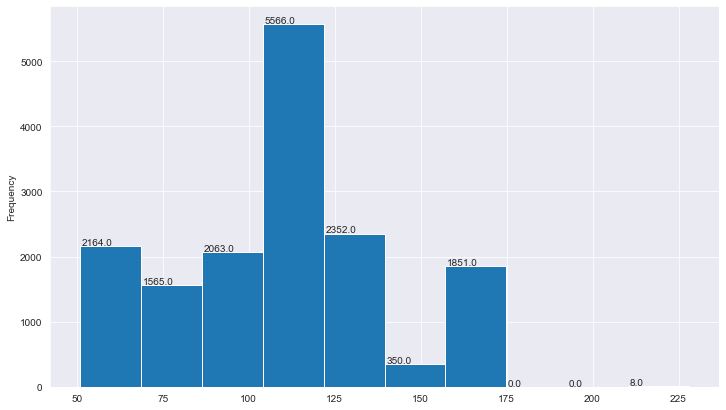

In [931]:
sns.set_style("darkgrid")
g = cars_new["hp"].plot.hist(bins=10,figsize=(12,7))
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.5, p.get_height()+17.5));
    

In [932]:
cars_new["hp"][outlier_up]

3353     110.0
3587     110.0
3590     110.0
3592     110.0
3593     110.0
3594     110.0
3595     110.0
3596     110.0
3597     228.0
3598     110.0
3599     110.0
3600     110.0
3601     110.0
3602     110.0
3603     110.0
3604     110.0
3605     110.0
3606     110.0
3608     110.0
3609     110.0
3610     110.0
3648     110.0
3649     135.0
10507    154.0
10513    154.0
10515    154.0
10548    154.0
10571    154.0
10789    154.0
11117    154.0
11432    154.0
12411    154.0
12412    154.0
12414    154.0
12417    154.0
12421    154.0
12422    154.0
12426    154.0
12437    154.0
12464    154.0
12469    154.0
12470    154.0
12472    154.0
12490    154.0
12491    154.0
12492    154.0
12494    154.0
12503    154.0
12509    154.0
12518    154.0
12519    154.0
12520    154.0
12521    154.0
12523    154.0
12526    154.0
12527    154.0
12529    154.0
12530    154.0
12531    154.0
12532    154.0
12534    154.0
12536    154.0
12541    154.0
12542    154.0
12545    155.0
12552    154.0
12553    1

In [933]:
after = cars_new["hp"].describe()
after

count    15919.000000
mean       108.298574
std         28.019925
min         51.000000
25%         87.000000
50%        110.000000
75%        125.000000
max        228.000000
Name: hp, dtype: float64

In [934]:
cars_new[outlier_low].head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,...,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
3913,Audi A3,Audi A3 Sportback 2.0TDI 150 Sline Stronic 7,Sedans,20440,VAT deductible,24000.0,2017-08-01,110.0,1,8,2017,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1598.0,4.0,1845.000000,diesel,119,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",3,Used,28,4.1,4.4,4.0,7.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
6005,Opel Astra,"SW OPEL SW 1.0 EASYTRONIC 105 CV Elective, 77 ...",Station wagon,11600,VAT deductible,73860.0,2017-02-01,110.0,1,2,2017,Black,Metallic,None,Station wagon,5.0,5.0,Automatic,998.0,4.0,1265.916667,benzin,167,NaN,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",3,Used,34,4.2,5.1,3.7,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
6034,Opel Astra,"SW OPEL SW 1.0 EASYTRONIC 105 CV Elective, 77 ...",Station wagon,11600,VAT deductible,76010.0,2017-02-01,110.0,1,2,2017,Silver,Metallic,Cloth,Station wagon,5.0,5.0,Automatic,998.0,4.0,1364.000000,benzin,102,NaN,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","Alarm system,Central door lock,Driver-side air...",3,Used,34,4.4,5.7,3.7,6.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

# cars price

In [935]:
q1 = cars_new["price"].quantile(0.25)
q3 =  cars_new["price"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["price"] < lower_lim)
outlier_up =(cars_new["price"]> upper_lim)

In [936]:
q1 = cars_new["price"].quantile(0.25)
q1

12850.0

In [937]:
ıqr

9050.0

In [938]:
lower_lim

3800.0

In [939]:
cars.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [940]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            for j in cars_new.body_type.unique():
                x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col]
                if len(x) == 0:
                    pass
                else:    
                    y = pd.Series(winsorize(x,(0.11,0.11)))
                    y.index = x.index
            
                    cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col] = y

In [941]:
x = cars_new.loc[(cars_new.make_model=="Renault Espace")&outlier_up,"price"] 
x.describe()

count      229.00000
mean     42541.09607
std       6391.05061
min      35500.00000
25%      37870.00000
50%      39990.00000
75%      46666.00000
max      68320.00000
Name: price, dtype: float64

In [942]:
bb = pd.Series(winsorize(x,(0.001,0.5)))
bb.describe()

count      229.000000
mean     38833.384279
std       1528.588112
min      35500.000000
25%      37870.000000
50%      39990.000000
75%      39990.000000
max      39990.000000
dtype: float64

In [943]:
outlier("price")

In [944]:
cars_new.price.describe()

count    15919.000000
mean     17737.777184
std       6612.561971
min       5250.000000
25%      12980.000000
50%      16825.000000
75%      21500.000000
max      67600.000000
Name: price, dtype: float64

In [945]:
#bb.index= x.index
#bb

In [946]:
#cars_new.loc[(cars_new.make_model=="Renault Espace")&outlier_up,"price"] =bb

In [947]:
#cars_new.loc[(cars_new.make_model=="Renault Espace")&outlier_up,"price"] 

# Nr of Door

In [948]:
cars_new["Nr. of Doors"].unique()

array([5., 3., 4.])

In [949]:
cars_new.groupby(["body_type","make_model"])["Nr. of Doors"].value_counts()

body_type      make_model      Nr. of Doors
Compact        Audi A1         5.0              679
                               4.0              211
                               3.0              149
               Audi A3         5.0              165
                               3.0               11
                               4.0                6
               Opel Astra      5.0              182
                               4.0                5
               Opel Corsa      5.0              531
                               3.0              430
                               4.0              269
               Opel Insignia   5.0               26
                               4.0                1
               Renault Clio    5.0              311
                               4.0              176
               Renault Espace  5.0                8
                               4.0                1
Convertible    Audi A3         3.0                7
                    

# Nr. of Seats

In [950]:

cars_new.loc[cars_new.make_model=="Renault Espace","body_type"].value_counts()

Van              794
Station wagon     93
Transporter       55
Sedans            21
Off-Road           9
Compact            9
Other              8
Coupe              2
Name: body_type, dtype: int64

In [951]:
cars_new.loc[cars_new.make_model=="Renault Espace","body_type"]=cars_new.loc[cars_new.make_model=="Renault Espace","body_type"].apply(lambda x: "Van" 
if x == "Sedans" or x == "Compact" or x=="Off-Road" or x== "Other" or x=="Coupe"else x ) 

In [952]:
cars_new["Nr. of Seats"].unique()

array([5., 4., 6., 3., 2., 7.])

In [953]:
cars_new.groupby(["body_type","make_model"])["Nr. of Seats"].value_counts()

body_type      make_model      Nr. of Seats
Compact        Audi A1         5.0              572
                               4.0              465
                               3.0                1
                               6.0                1
               Audi A3         5.0              182
               Opel Astra      5.0              187
               Opel Corsa      5.0             1225
                               4.0                5
               Opel Insignia   5.0               27
               Renault Clio    5.0              478
                               2.0                9
Convertible    Audi A3         4.0                5
                               5.0                3
Coupe          Audi A1         4.0                1
                               5.0                1
               Audi A3         5.0                4
               Opel Astra      4.0                1
                               5.0                1
               Opel 

# ----------------------------------------------------------------------------

In [954]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,VAT deductible,73000.0,2016-08-01,66.0,1,0,2016,Brown,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1422.0,3.0,1195.000000,diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",4,Used,40,3.8,4.3,3.5,6.0
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,VAT deductible,16200.0,2016-05-01,66.0,1,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1227.309322,diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",4,Used,43,4.1,4.6,3.8,6.0


# Displacement

In [955]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            for j in cars_new.body_type.unique():
                x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col]
                if len(x) == 0:
                    pass
                else:    
                    y = pd.Series(winsorize(x,(0.11,0.19)))
                    y.index = x.index
            
                    cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col] = y

In [956]:
cars.Displacement.head()

0    1422.0
1    1798.0
2    1598.0
3    1422.0
4    1422.0
Name: Displacement, dtype: float64

In [957]:
cars.Displacement.describe()

count    15919.000000
mean      1424.132341
std        332.598580
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Displacement, dtype: float64

In [958]:
q1 = cars_new["Displacement"].quantile(0.25)
q3 =  cars_new["Displacement"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["Displacement"] < lower_lim)
outlier_up =(cars_new["Displacement"]> upper_lim)

In [959]:
cars_new.Displacement[outlier_up].tail()

3648      2480.0
3649      2480.0
7169     15898.0
10771     2967.0
10932    16000.0
Name: Displacement, dtype: float64

In [960]:
cars_new.Displacement[outlier_low].tail()

15575    160.0
15576    160.0
15577    160.0
15578    160.0
15579    160.0
Name: Displacement, dtype: float64

In [961]:
cars_new.Displacement.describe()

count    15919.000000
mean      1424.132341
std        332.598580
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Displacement, dtype: float64

In [962]:
outlier("Displacement")

In [963]:
cars_new.Displacement.describe()

count    15919.000000
mean      1415.945709
std        258.457466
min        898.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max       2480.000000
Name: Displacement, dtype: float64

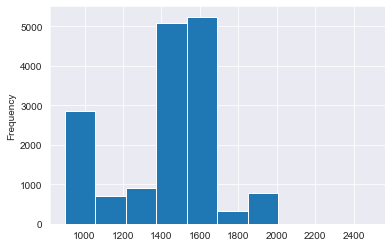

In [964]:
cars_new.Displacement.plot.hist()

In [965]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,VAT deductible,73000.0,2016-08-01,66.0,1,0,2016,Brown,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1422.0,3.0,1195.000000,diesel,99,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",4,Used,40,3.8,4.3,3.5,6.0
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,VAT deductible,16200.0,2016-05-01,66.0,1,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1227.309322,diesel,109,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",4,Used,43,4.1,4.6,3.8,6.0


# CO2 EMİSSİON

In [966]:
def outlier(col):
    for i in cars_new.make_model.unique():
        for k in cars_new.hp.unique():
            for j in cars_new.body_type.unique():
                x = cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col]
                if len(x) == 0:
                    pass
                else:    
                    y = pd.Series(winsorize(x,(0.11,0.19)))
                    y.index = x.index
            
                    cars_new.loc[(cars_new.make_model == i)&(cars_new.hp == k)&(cars_new.body_type==j),col] = y

In [967]:
q1 = cars_new["CO2 Emission"].quantile(0.25)
q3 =  cars_new["CO2 Emission"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["CO2 Emission"] < lower_lim)
outlier_up =(cars_new["CO2 Emission"]> upper_lim)

In [968]:
cars_new["CO2 Emission"].describe()

count    15919.000000
mean       117.954457
std         19.979484
min         12.000000
25%        104.000000
50%        117.000000
75%        129.000000
max        990.000000
Name: CO2 Emission, dtype: float64

In [969]:
cars_new["CO2 Emission"][outlier_up].sort_values(ascending=False)

4556     990
535      331
10513    253
10772    239
10771    239
12054    199
12529    199
12554    197
12422    197
10789    197
12533    197
12553    197
12530    197
10515    194
15846    194
3590     194
3591     194
15681    193
15643    191
15644    191
10548    190
3609     189
10571    189
3587     189
10744    189
3592     189
3589     189
3593     189
3611     189
3610     189
10507    189
3608     189
3605     189
3601     189
3598     189
3596     189
3602     189
3603     189
3595     189
3604     189
3649     189
3606     189
3607     189
3600     188
12578    188
13028    188
15300    188
3648     188
12426    188
3599     188
13054    187
12521    187
12526    187
12509    187
12519    187
12518    187
12523    187
12520    187
12561    187
13031    187
13029    187
12568    187
13027    187
12961    187
12960    187
12959    187
12945    187
12943    187
12942    187
12494    187
12542    187
12552    187
12560    187
12503    187
12470    187
12411    187
12412    187

In [970]:
cars_new["CO2 Emission"][outlier_low]

3612     36
3613     36
3615     36
3616     36
3617     36
3619     36
3620     36
3621     36
4089     60
4090     60
5818     12
6578     12
6579     12
8110     14
8111     14
8542     12
9798     51
11888    14
12343    13
12547    45
Name: CO2 Emission, dtype: int64

In [971]:
outlier("CO2 Emission")

In [972]:
cars_new["CO2 Emission"].describe()

count    15919.000000
mean       117.195552
std         16.748815
min         82.000000
25%        104.000000
50%        116.000000
75%        128.000000
max        189.000000
Name: CO2 Emission, dtype: float64

# Gear

In [973]:
cars.head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0


In [974]:
cars_new["Gear"].unique()

array([7., 6., 5., 8.])

In [975]:
cars_new[cars_new["Gear"]==8.0]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,...,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
215,Audi A1,1.0 TFSI (8X) Sportback ultra,Compact,16880,VAT deductible,6680.000000,2017-12-01,92.0,1,12,2017,Blue,Metallic,Cloth,Compact,5.0,4.0,Automatic,999.0,3.0,1186.094382,benzin,104,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3,Used,24,4.4,5.2,3.9,8.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1033,Audi A1,1.0 SBACK TFSI DESIGN 82 CV NEOPATENTATI,Sedans,20500,VAT deductible,3000.000000,2018-12-01,85.0,1,24,2018,Grey,Metallic,Cloth,Sedans,5.0,5.0,Automatic,999.0,4.0,1179.635135,benzin,108,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Voice Control...","ABS,Adaptive Cruise Control,Alarm system,Centr...",2,Employee's car,12,4.9,5.6,4.5,8.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,1,1,0,1,...,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
10151,Opel Corsa,1.4 120 JAHRE 5t KAMERA/SHZ/2xPDC/R4.0/ALU,Compact,14770,VAT deductible,0.000000,2019-03-01,66.0,0,24,2019,Grey,Metallic,Cloth,Compact,4.0,5.0,Automatic,1398.0,4.0,1180.367670,benzin,136,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrically h...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",1,New,9,5.9,7.5,5.1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,

In [976]:
cars_new.groupby("make_model")["Gear"].value_counts()

make_model      Gear
Audi A1         5.0     1198
                7.0     1142
                6.0      272
                8.0        2
Audi A2         5.0        1
Audi A3         6.0     1623
                7.0     1470
                5.0        4
Opel Astra      6.0     2006
                5.0      519
                7.0        1
Opel Corsa      5.0     1487
                6.0      731
                8.0        1
Opel Insignia   6.0     2298
                8.0      283
                5.0       15
                7.0        2
Renault Clio    5.0     1186
                6.0      647
                7.0        5
                8.0        1
Renault Duster  6.0       25
                5.0        9
Renault Espace  6.0      751
                7.0      222
                5.0       18
Name: Gear, dtype: int64

In [977]:
cars_new.loc[(cars_new["make_model"]=="Opel Insignia")&(cars_new["Gear"]==8.0),"Gear"] = 5.0

In [978]:
outlier("Gear")

In [979]:
cars_new.groupby("make_model")["Gear"].value_counts()

make_model      Gear
Audi A1         5.0     1194
                7.0     1147
                6.0      273
Audi A2         5.0        1
Audi A3         6.0     1627
                7.0     1470
Opel Astra      6.0     2014
                5.0      512
Opel Corsa      5.0     1504
                6.0      715
Opel Insignia   6.0     2362
                5.0      236
Renault Clio    5.0     1187
                6.0      651
                7.0        1
Renault Duster  6.0       25
                5.0        9
Renault Espace  6.0      767
                7.0      222
                5.0        2
Name: Gear, dtype: int64

In [980]:
cars_new.head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,...,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,85.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,...,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,Audi A1,1.8 TFSI sport,Sedans,16400,Price negotiable,80000.0,2017-03-01,92.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1498.0,4.0,1255.000000,benzin,128,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1422.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0

In [981]:
#cars_new.drop(["Safety & Security","Extra","Types","Entertainment & Media","Comfort & Convenience",
#"Body Color","Paint Type","Upholstery","Body","body_type","vat","Fuel","Gearing Type"
#,"Emission Class","Body"],inplace=True,axis=1)

In [982]:
cars_new.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Age,Types,age_as_month,Comb,City,Country,Gear,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,...,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van,Price negotiable,VAT deductible,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow,Cloth,Full leather,Part leather,Velour,alcantara,Automatic,Manual,Semi-automatic,benzin,diesel,Demonstration,Employee's car,New,Pre-registered,Used
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,85.0,2,0,2016,Black,Metallic,Cloth,Sedans,5.0,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,47,3.8,4.3,3.5,7.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,...,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,Audi A1,1.8 TFSI sport,Sedans,16400,Price negotiable,80000.0,2017-03-01,92.0,1,3,2017,Red,Metallic,Cloth,Sedans,3.0,4.0,Automatic,1498.0,4.0,1255.000000,benzin,128,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",3,Used,33,5.6,7.1,4.7,7.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,Cloth,Sedans,4.0,4.0,Automatic,1422.0,3.0,1330.563953,diesel,99,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4,Used,46,3.8,4.4,3.4,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0

In [983]:
cars.to_csv("cars_final.csv")

# cars km 

In [984]:
q1 = cars_new["km"].quantile(0.25)
q3 =  cars_new["km"].quantile(0.75)
ıqr = q3-q1
ıqr

lower_lim=q1- 1.5 *ıqr
upper_lim=q3+1.5 *ıqr

outlier_low =(cars_new["km"] < lower_lim)
outlier_up =(cars_new["km"]> upper_lim)

In [985]:
cars_new[["km","Previous Owners","First Registration"]][outlier_up]

,km,Previous Owners,First Registration
25,115000.0,1,2016
34,126000.0,1,2016
61,118500.0,1,2016
63,192000.0,1,2016
64,130000.0,1,2016
328,137066.0,1,2016
369,115900.0,2,2017
397,146140.0,1,2016
443,129550.0,2,2016
465,125000.0,1,2016


In [986]:
cars_new[["km","Previous Owners","First Registration"]][outlier_low]

,km,Previous Owners,First Registration


In [988]:
cars.loc[(cars.make_model=="Audi A1") & (cars.registration==2018),"km"]

Series([], Name: km, dtype: float64)

In [991]:
cars[(cars.make_model=="Audi A1") & (cars["First Registration"]==2018)][["km"]]

,km
10,11300.000000
16,9752.000000
19,13406.000000
23,9077.000000
24,3000.000000
28,14556.000000
67,13135.000000
69,2949.000000
73,11335.000000
74,6396.000000


In [ ]:
cars[(cars.make_model=="Audi A1") & (cars.registration==2018)][["km"]].fillna(cars[(cars.make_model=="Audi A1") & (cars.registration==2018)&(cars.body_type=="Sedans")][["km"]].mean(),inplace=True)